For the most up to date version of this notebook, please copy from this link


---



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ZmbeTro4SqT7h_TfW63MLdqbrCUk_1br#scrollTo=KwDS9qqBbMQa)

# Setting up our envionment

In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 26.35 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 352.6 MB 13 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=c44e108470c0af63c60c32c8afb42c57122f58d628ddcedb32645f894eaf0c7b
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-ta0soj_4/pycocotools_8118fd1e1cbe484db7ea3e6820d18db2
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-ta0soj_4/pycocotools_8118fd1e1cbe484db7ea3e6820d18db2
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263851 sha256=ab0c49942dd747c2cd7d92a3a148246b50f6f44492b6a9dc51491953856e2f26
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [ ]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     - 91 kB 574 kB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47878 sha256=6cb1b1ed8ca1732d0ff26275bd50a43ca8abe6de341b067c6a38093848f158a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-xj9nb5xo/wheels/b5/36/d9/593e7ac06d343d0a32138fa6c402dc3a0bd31442c9fe53f76c
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
panel 0.12.1 requires tqdm>=4.48.0, but you have tqdm 4.28.1 which is incompatible.
fbprophet 0.7.1 requires tqdm>=4.36.1, but you have tqdm 4.28.1 which is incompatible.
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl

# Let's get some data! 

The best part about Roboflow is the efficient management of your datasets. [Upload you dataset](roboflow.ai) and you will recieve a fresh curl code to ouput it in whatever augmented and annotated format you need. 

In [ ]:
#fresh curl courtesy of roboflow.ai, outputing our dataset in Coco Json format

!curl -L "https://app.roboflow.com/ds/GePVUgLA5H?key=DHpmUcwERI" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   879  100   879    0     0    850      0  0:00:01  0:00:01 --:--:--   851
100 13.7M  100 13.7M    0     0  6313k      0  0:00:02  0:00:02 --:--:-- 13.8M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_annotations.coco.json  
 extracting: test/car_fire1_7_jpg.rf.4c46aef34c456027c4b0a94c8a736aee.jpg  
 extracting: test/fire1372_jpg.rf.f41756c67e75a1523a74a717118919c6.jpg  
 extracting: test/fire172_jpg.rf.e8aa6d875d648f9eff1637e87ac466de.jpg  
 extracting: test/forest_fire10_14_jpg.rf.e6eeb625c9ca4170a6b02579fc4fef66.jpg  
 extracting: test/forest_fire10_21_jpg.rf.2c16fb09209c36f7cc33dedcba1d57be.jpg  
 extracting: test/forest_fire11_106_jpg.rf.87f0e9e15885df439e8ad1dff45743c2.jpg  
 extracting: test/forest_fire11_172_jpg.rf.b8044659a0e33c2

In [ ]:
#let's take a look at our directory
#notice the data came down in train, valid, test, splits - this is pre set during the dataset upload process
%ls

Monk_Object_Detection/  README.roboflow.txt  test/   train/
README.dataset.txt      sample_data/         test1/  valid/


In [ ]:
#let's take a peak in train
#jpg images and some coco json annotations
%ls train

_annotations.coco.json
car_fire1_0_jpg.rf.63483c446e940bccd4b5815003e6606d.jpg
car_fire1_0_jpg.rf.9691982d989b95b0f506383b2013d175.jpg
car_fire1_0_jpg.rf.b5635cfe55816b284f601f15ca4cd425.jpg
car_fire1_3_jpg.rf.1d2a6ce964a4c8e8c2f5d32f69eb1288.jpg
car_fire1_3_jpg.rf.8d6e43301277a9415f0df94ddbcd6be5.jpg
car_fire1_3_jpg.rf.e7963a49afac8325848105510c9b25c8.jpg
car_fire1_5_jpg.rf.12b593691d7206b21e848faa7e6e5b13.jpg
car_fire1_5_jpg.rf.2f541e6d3797fa143188bdfedde128b4.jpg
car_fire1_5_jpg.rf.ad5f23647b1f0df99a0e4427cf368b6a.jpg
fire101_jpg.rf.2b2e22122c077744f17ae2b8f98ad4f8.jpg
fire101_jpg.rf.94f93ec6d8e0a8577b3dc172f28456b1.jpg
fire101_jpg.rf.f80f3d54de353256e4b6280620bfd14e.jpg
fire114_jpg.rf.1da3ad898f59fc03094896fb5061a74d.jpg
fire114_jpg.rf.3f07b171ac9ebd505cedd23773d91672.jpg
fire114_jpg.rf.94f9e93b1e51ee410b664ab6dc568151.jpg
fire126_jpg.rf.434789c36947f7a4be540227622de8d1.jpg
fire126_jpg.rf.906aac4446753af6d55b502e7d299c72.jpg
fire126_jpg.rf.cab4bdcf6a2ae6fecc6894d93dc19cce.jpg
fire1

In [ ]:
#in the next three cells, we move the data into a structure that the image detection library will be expecting
#but no file data manipulation is necessary
#images can also be segmented into class folders, but we combine all classes here
!mkdir fire
!mkdir fire/annotations
!mkdir fire/Annotations
!mkdir fire/Images

In [ ]:
%cp train/_annotations.coco.json fire/annotations/instances_Images.json

In [ ]:
%cp train/*.jpg fire/Images/

# Training

In this section we set up the efficientDet-d0 model from backbone and train to our custom case

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
gtf = Detector();

In [ ]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "fire";
img_dir = "./";
set_dir = "Images";

In [ ]:
#smells like some free compute from Colab, nice
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Inference

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer

# Export Trained Weights

# Reloading Trained Weights after Export

Imagine you have exported your trained model and would like to reaccess it later. This portion of the notebook picks up the trained model and starts at inference


In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

fatal: destination path 'Monk_Object_Detection' already exists and is not an empty directory.


In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-7zzh1jcm/pycocotools_0640c08a41a341ef837cd446eea9e4b0
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-7zzh1jcm/pycocotools_0640c08a41a341ef837cd446eea9e4b0
  Using cached https://github.com/chengs/tqdm/archive/colab.zip
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47878 sha256=756f9c8255005bab85db765334615d005d9c6563d0b8253840628ec37892f6c8
  Stored in directory: /tmp/pip-ephem-wheel-cache-p908vr39/wheels/b5/36/d9/593e7ac06d343d0a32138fa6c402dc3a0bd31442c9fe53f76c
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, b

In [ ]:
!mkdir trained

mkdir: cannot create directory ‘trained’: File exists


In [ ]:
#recover trained weights
!cp 'signatrix_efficientdet_coco_2021-09-27-22_36.onnx' 'trained/signatrix_efficientdet_coco.onnx'
!cp 'signatrix_efficientdet_coco_2021-09-27-22_36.pth' 'trained/signatrix_efficientdet_coco.pth'

In [ ]:
%ls trained

signatrix_efficientdet_coco.onnx  signatrix_efficientdet_coco.pth


In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained/")

In [ ]:
!ls test

_annotations.coco.json
car_fire1_7_jpg.rf.4c46aef34c456027c4b0a94c8a736aee.jpg
fire1372_jpg.rf.f41756c67e75a1523a74a717118919c6.jpg
fire172_jpg.rf.e8aa6d875d648f9eff1637e87ac466de.jpg
forest_fire10_14_jpg.rf.e6eeb625c9ca4170a6b02579fc4fef66.jpg
forest_fire10_21_jpg.rf.2c16fb09209c36f7cc33dedcba1d57be.jpg
forest_fire11_106_jpg.rf.87f0e9e15885df439e8ad1dff45743c2.jpg
forest_fire11_172_jpg.rf.b8044659a0e33c2ce3f82cee77db9695.jpg
forest_fire11_23_jpg.rf.fcc08446d02b2029ac6cd6a8d7c0b5ae.jpg
forest_fire11_28_jpg.rf.e415951fb5f83ce0bf4081cea83f860d.jpg
forest_fire11_59_jpg.rf.bb8d12c5f7f59808e3be56f2d92ac74e.jpg
forest_fire3_106_jpg.rf.fdb23c9eab56cfbcb60b0ec5a7fe9648.jpg
forest_fire3_135_jpg.rf.20dca59236aca1f758066c4ed478353b.jpg
forest_fire3_151_jpg.rf.bdcf319d6d3c7c0bbf485031e13c4358.jpg
forest_fire3_310_jpg.rf.f58fa6282238880f0bfdacacb3e50974.jpg
forest_fire35_1440_jpg.rf.b80f121ce7f1aa4a9608ed5d8c205e40.jpg
forest_fire3_91_jpg.rf.e4e24fb292a2ab3a2f0e323f0e6fd904.jpg
forest_fire42_2970_j

In [ ]:
#extract class list from our annotations
#in your application you will probably already have this saved
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

['effiecient-det', '-1', 'fire']

In [ ]:
%%time
#bang!
img_path = "test/forest_fire3_135_jpg.rf.20dca59236aca1f758066c4ed478353b.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.061s)
CPU times: user 86.3 ms, sys: 2.67 ms, total: 88.9 ms
Wall time: 90.9 ms


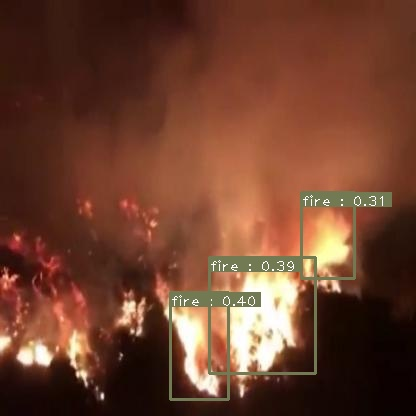

In [ ]:
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
summary

(0.05970191955566406,
 tensor([0.8200, 0.2287, 0.2038, 0.1910, 0.0855, 0.0509], device='cuda:0'),
 tensor([2, 2, 2, 2, 2, 2], device='cuda:0'),
 tensor([[204.7529, 266.0940, 311.4516, 375.5663],
         [302.3070, 191.8219, 353.6240, 276.8091],
         [175.9922, 298.4083, 222.1226, 399.8331],
         [  5.3012, 245.7866,  83.5039, 371.6321],
         [  2.6809, 228.9768,  19.7569, 264.2571],
         [  4.9214, 227.0289,  23.7056, 253.5167]], device='cuda:0'))

In [ ]:
!mkdir test_true

In [ ]:
# #bang!
import glob
for imageName in glob.glob('test/*.jpg'): #assuming JPG
    gtf.Predict(imageName, class_list, vis_threshold=0.2);
    display(Image(filename='output.jpg'))
    print("\n")

# **Cropping**

In [ ]:
import numpy as np # linear algebra
import xml.etree.ElementTree as ET # for parsing XML
import matplotlib.pyplot as plt # to show images
from PIL import Image # to read images
import os
import glob

def crop_image(img,bbx):
  cropped = []
  plt.figure(figsize=(10,10))
  im=Image.open(img)
  for i in range(0,len(bbx)):
    cropped.append(im.crop(bbx[i]))       
  return cropped 

crp = crop_image("test/forest_fire11_28_jpg.rf.e415951fb5f83ce0bf4081cea83f860d.jpg",boxes.tolist())

<Figure size 720x720 with 0 Axes>

In [ ]:
im = Image.open('0.png').convert('L')
im = im.crop((1, 1, 98, 33))
im.save('_0.png')

In [ ]:
!mkdir crop_save
crp[1].load()
crp[1].save("crop_save/", 'jpg')

In [ ]:
classes = ['fire','sunset']

# **Combination of EfficientDet & EfficientNetv2**

In [ ]:
EfficientNet_model = tf.keras.models.load_model('/content/drive/MyDrive/my_model')
EfficientNet_model.load_weights('/content/drive/MyDrive/my_model/my_model_weights.h5')

In [ ]:
def NetDet(imagePath,probDet):
  low_thr  = 0.48
  high_thr = 0.99
  if low_thr<= probDet <= high_thr:
      prediction_scores = EfficientNet_model.predict(np.expand_dims(imagePath, axis=0))
      max_predicted = max(prediction_scores)
      if max_predicted >= 0.48:
          predicted_index = np.argmax(prediction_scores)
          plt.imshow("test/forest_fire3_135_jpg.rf.20dca59236aca1f758066c4ed478353b.jpg")
          plt.axis('off')
          plt.show()
          print(prediction_scores)
          print(claass[predicted_index])


In [1]:
scores = [0.8200, 0.2287, 0.2038, 0.1910, 0.0855, 0.0509]
score = 0.82
img_path = "test/forest_fire3_135_jpg.rf.20dca59236aca1f758066c4ed478353b.jpg";
NetDet(img_path,scores[0])